In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/Administrator/Desktop/Data Science/Customer Churn.csv')

In [3]:
print("Dimension", df.shape)
print("Structure", df.info())
print("Summary", df.describe())

Dimension (3150, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: 

In [4]:
print("Missing value\n", df.isna().sum())
df_filled = df.fillna(df.mean())

Missing value
 Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


array([[<Axes: title={'center': 'Status'}>]], dtype=object)

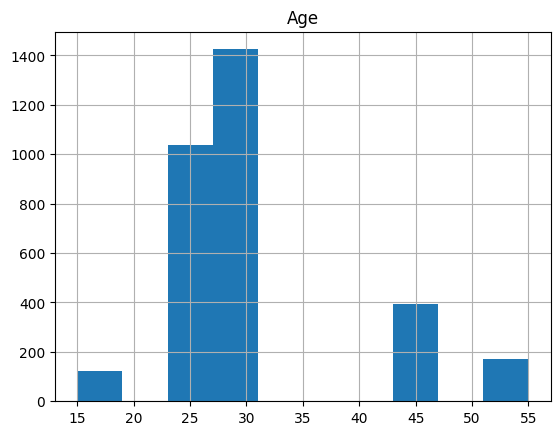

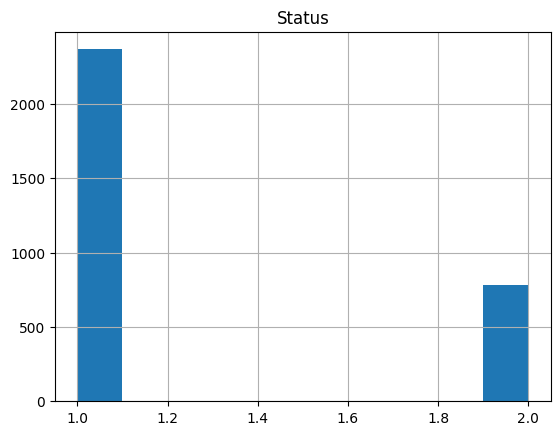

In [5]:
# Select two continuous variables to plot histograms
df.hist(column='Age')

df.hist(column='Status')

<Axes: xlabel='Age'>

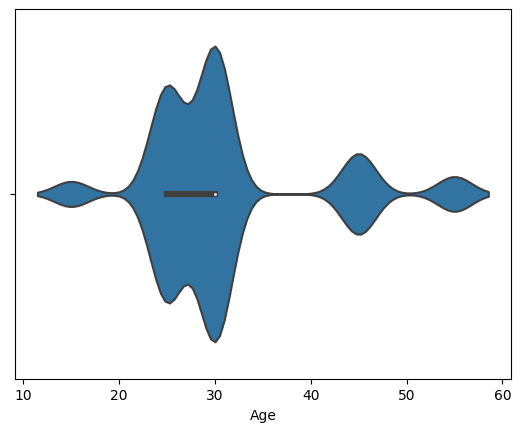

In [6]:
sns.violinplot(data=df_filled, x='Age')

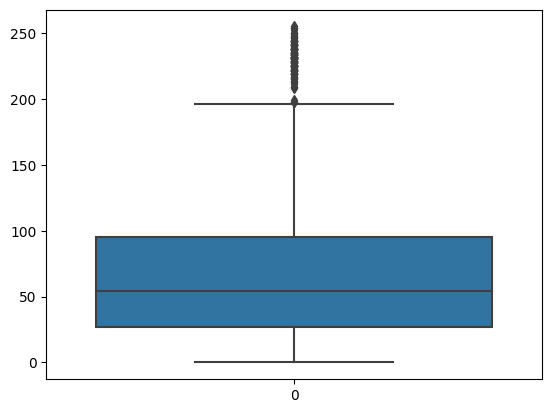

In [24]:
# Before outlier treatment
sns.boxplot(df['Frequency of use'])
plt.show()
# After outlier treatment
q1 = df['Frequency of use'].quantile(0.25)
q3 = df['Frequency of use'].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

<Axes: >

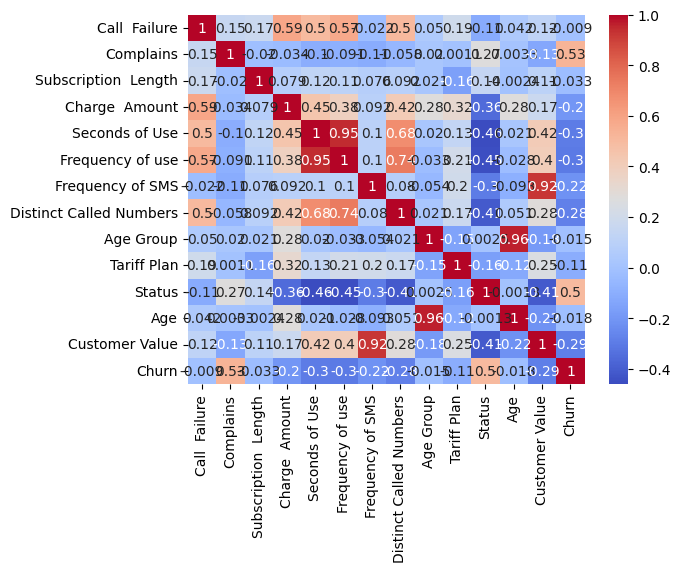

In [8]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

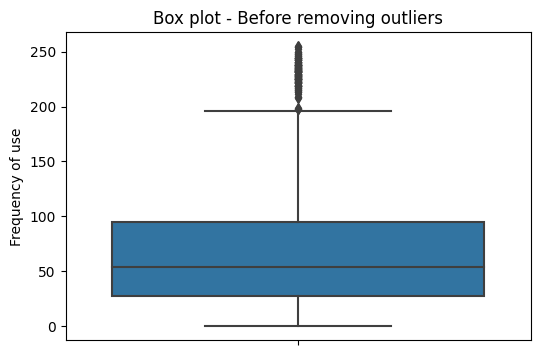

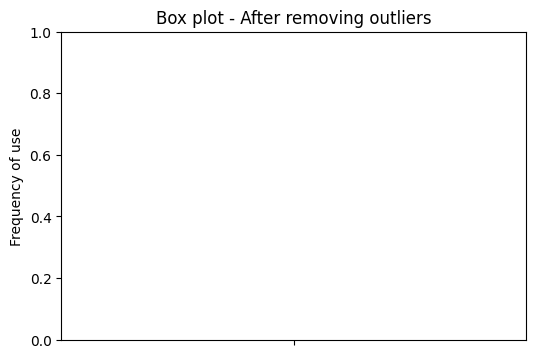

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Frequency of use')
plt.ylabel('Frequency of use')
plt.title('Box plot - Before removing outliers')
plt.show()
nodf = df[(df['Frequency of use'] >= upper) & (df['Frequency of use'] <= lower)]
plt.figure(figsize=(6, 4))
sns.boxplot(data=nodf, y='Frequency of use')
plt.ylabel('Frequency of use')
plt.title('Box plot - After removing outliers')
plt.show()

In [9]:
num = ['Complains','Age Group','Status','Age','Churn']
scaler = StandardScaler()
df[num] = scaler.fit_transform(df[num])
plt.show()

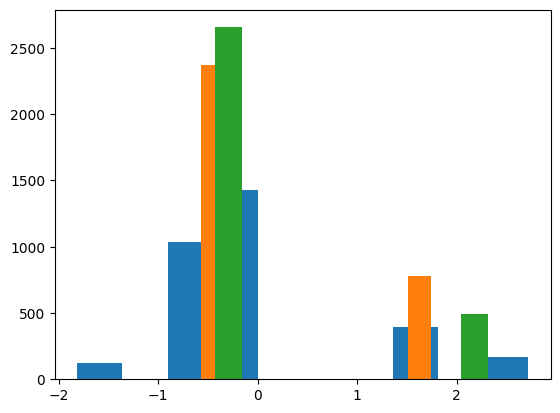

In [33]:
cont_var = ['Age','Status','Churn']
for var in cont_var:
    plt.hist(df[var])


In [34]:
mpg = pd.read_csv("C:/Users/Administrator/Downloads/mpg_raw.csv")

In [36]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [37]:
mpg.shape

(398, 9)

In [38]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [39]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [54]:
mpg['horsepower'].fillna(mpg['horsepower']).mean()

104.46938775510205

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

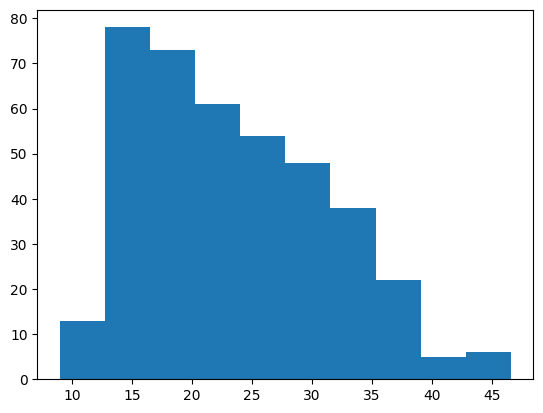

In [43]:
plt.hist(mpg['mpg'])

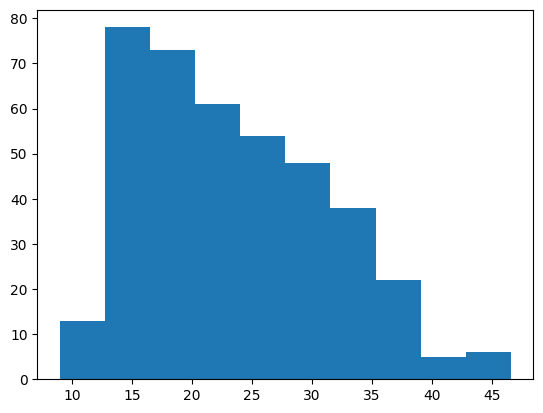

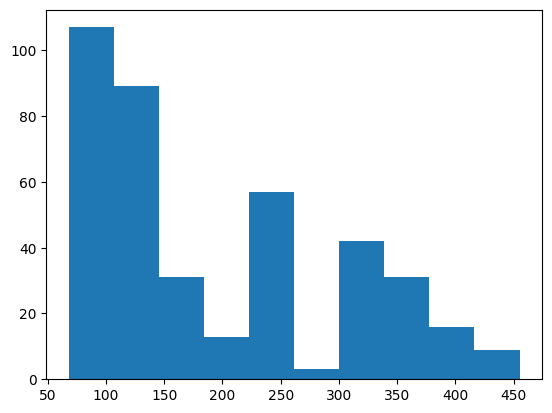

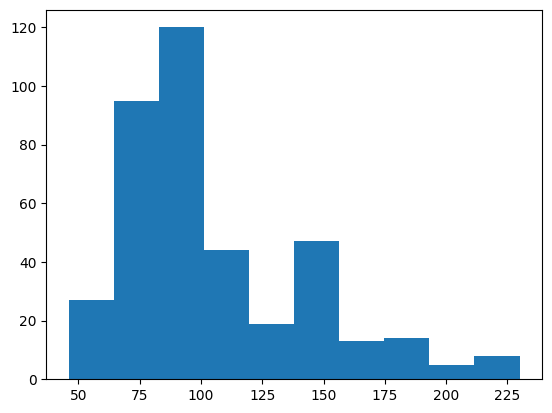

In [48]:
con_var = ['mpg','displacement','horsepower']
for var in con_var:
    plt.hist(mpg[var])
    plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x25dee965840>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x25dee9657b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x25dee965e40>,
 'cbars': <matplotlib.collections.LineCollection at 0x25dee9661a0>}

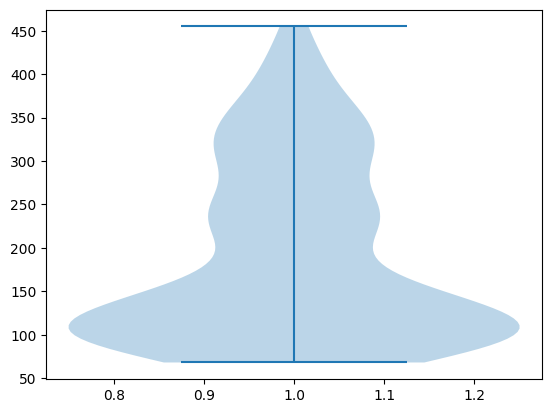

In [49]:
plt.violinplot(mpg['displacement'])

<Axes: ylabel='displacement'>

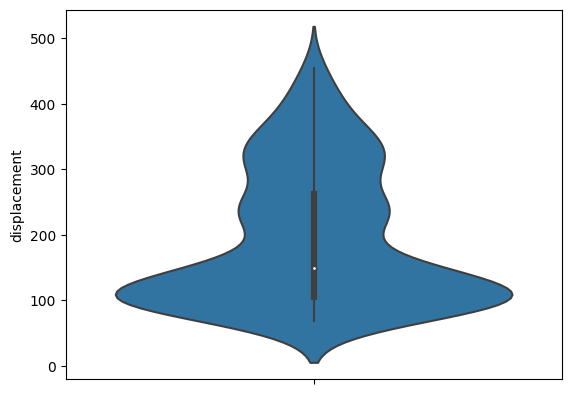

In [56]:
sns.violinplot(data=mpg,y='displacement')

<Axes: >

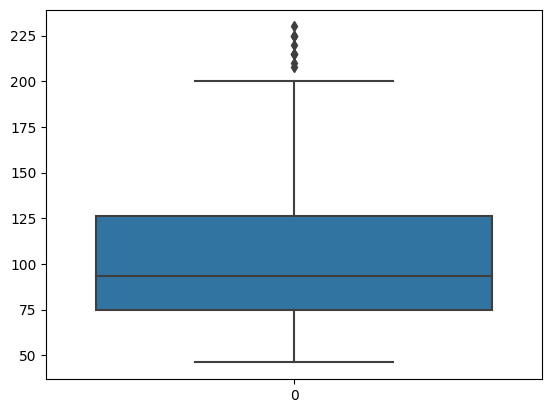

In [58]:
sns.boxplot(mpg['horsepower'])

In [62]:
Q1 = mpg['horsepower'].quantile(0.25)
Q3 = mpg['horsepower'].quantile(0.75)
Iqr = Q3 - Q1
LOWER = Q1 - 1.5 *Iqr
UPPER = Q3 + 1.5 *Iqr
print("L=",LOWER,"U=",UPPER)

L= -1.5 U= 202.5


<Axes: >

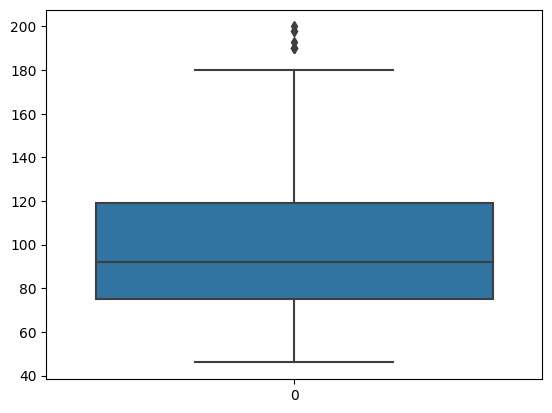

In [61]:
nompg = mpg[(mpg['horsepower']<= UPPER) & (mpg['horsepower']>= LOWER)]
sns.boxplot(nompg['horsepower'])

<Axes: >

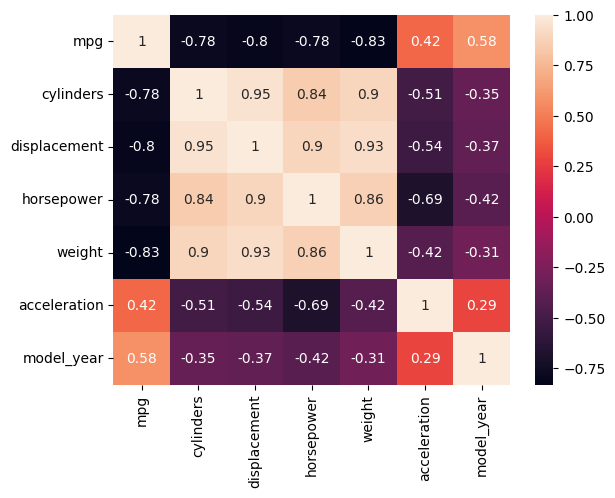

In [75]:
num = mpg.select_dtypes(include=[float,int]).columns
numcol = mpg[num]
corr=numcol.corr()
sns.heatmap(corr, annot=True)

In [73]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [79]:
from sklearn import preprocessing
Scaler = preprocessing.StandardScaler()
mpg[num] = Scaler.fit_transform(mpg[num])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,-0.706439,1.498191,1.090604,0.664133,0.630870,-1.295498,-1.627426,usa,chevrolet chevelle malibu
1,-1.090751,1.498191,1.503514,1.574594,0.854333,-1.477038,-1.627426,usa,buick skylark 320
2,-0.706439,1.498191,1.196232,1.184397,0.550470,-1.658577,-1.627426,usa,plymouth satellite
3,-0.962647,1.498191,1.061796,1.184397,0.546923,-1.295498,-1.627426,usa,amc rebel sst
4,-0.834543,1.498191,1.042591,0.924265,0.565841,-1.840117,-1.627426,usa,ford torino


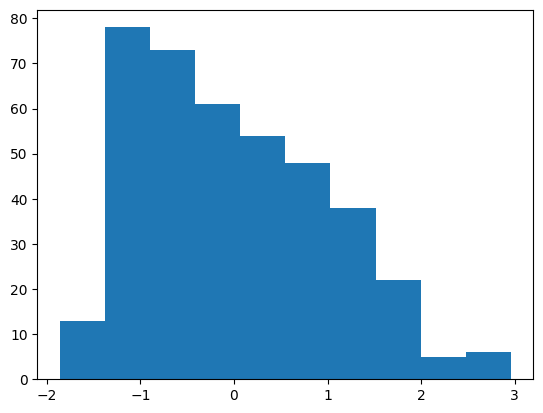

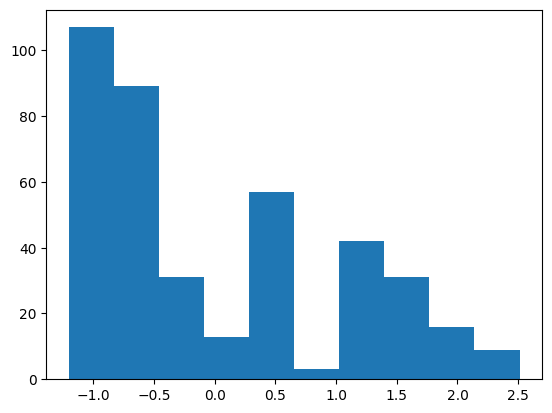

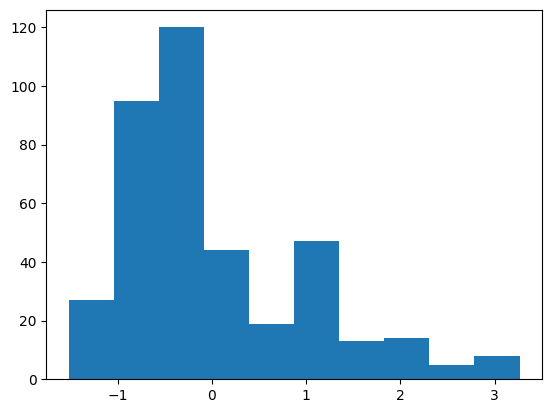

In [80]:
con_var = ['mpg','displacement','horsepower']
for var in con_var:
    plt.hist(mpg[var])
    plt.show()

<Axes: xlabel='horsepower', ylabel='displacement'>

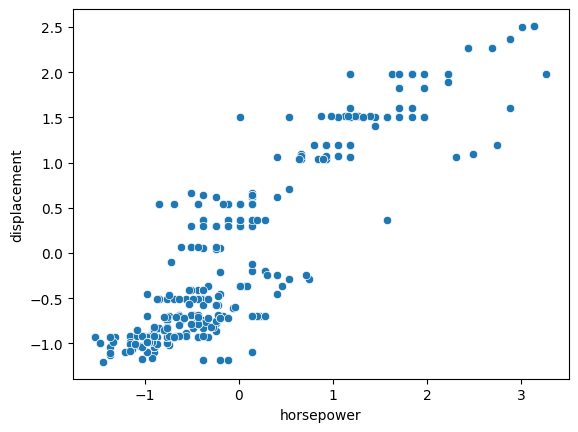

In [81]:
sns.scatterplot(data=mpg,x='horsepower',y='displacement')

<Axes: xlabel='count', ylabel='cylinders'>

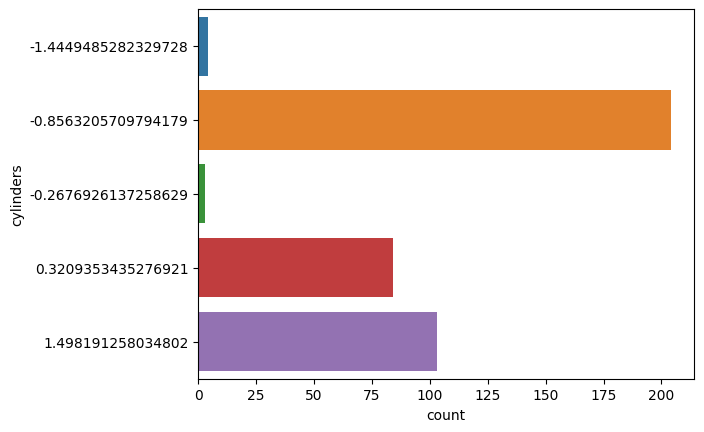

In [86]:
sns.countplot(data=mpg,y='cylinders')

<Axes: xlabel='cylinders', ylabel='acceleration'>

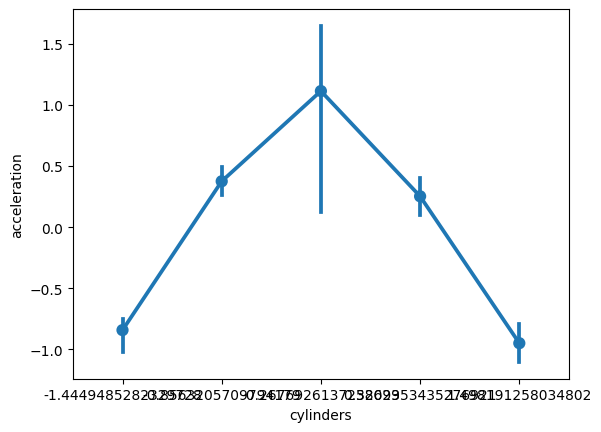

In [91]:
sns.pointplot(data=mpg,x='cylinders',y='acceleration')